In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [2]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
mock_alpha1 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_0_alpha_all_channels.csv", thousands=',')
mock_alpha2 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_1_alpha_all_channels.csv", thousands=',')
mock_alpha3 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_2_alpha_all_channels.csv", thousands=',')
mock_alpha4 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_3_alpha_all_channels.csv", thousands=',')
mock_alpha5 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_4_alpha_all_channels.csv", thousands=',')
mock_alpha6 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_5_alpha_all_channels.csv", thousands=',')
mock_alpha7 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_6_alpha_all_channels.csv", thousands=',')
mock_alpha8 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_7_alpha_all_channels.csv", thousands=',')

mock_alpha = mock_alpha1.append(mock_alpha2).append(mock_alpha3).append(mock_alpha4).append(mock_alpha5).append(mock_alpha6).append(mock_alpha7).append(mock_alpha8)

mock_non_alpha1 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_0_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha2 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_1_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha3 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_2_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha4 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_3_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha5 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_4_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha6 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_5_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha7 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_6_non_alpha_all_channels.csv", thousands=',')
mock_non_alpha8 = pd.read_csv("C:\\Users\\mmang\\Desktop\\cwt data\\CWT_DATA_channel_7_non_alpha_all_channels.csv", thousands=',')

mock_non_alpha = mock_non_alpha1.append(mock_non_alpha2).append(mock_non_alpha3).append(mock_non_alpha4).append(mock_non_alpha5).append(mock_non_alpha6).append(mock_non_alpha7).append(mock_non_alpha8)

In [3]:
mock_alpha.count

<bound method DataFrame.count of             0         1         2         3         4         5         6  \
0    0.269084  0.004796 -0.282477 -0.528524 -0.709574 -0.854970 -0.988849   
1   -0.600499 -0.773114 -0.890317 -0.961908 -0.958127 -0.844542 -0.626424   
2    0.894936  0.939200  0.856545  0.699931  0.490055  0.228706 -0.071000   
3   -0.744746 -0.918172 -0.984718 -0.971545 -0.880928 -0.695914 -0.414083   
4   -0.874245 -0.981355 -0.965972 -0.832328 -0.616338 -0.342526 -0.042660   
..        ...       ...       ...       ...       ...       ...       ...   
173 -1.013249 -0.668696 -0.072663  0.559951  0.958869  0.975273  0.630078   
174 -0.699944 -1.019296 -1.018378 -0.710273 -0.254686  0.201606  0.589926   
175  0.626968  0.849511  0.803620  0.473168 -0.061736 -0.612138 -0.943791   
176  0.378786 -0.271210 -0.809347 -1.014775 -0.862529 -0.418940  0.146642   
177  0.410394 -0.100902 -0.603066 -0.903907 -0.879733 -0.565074 -0.115235   

            7         8         9  ...    

In [4]:
mock_non_alpha.count

<bound method DataFrame.count of             0         1         2         3         4         5         6  \
0   -0.400305  0.267185  0.862085  0.900672  0.345713 -0.339945 -0.629193   
1   -0.145792 -0.652774 -0.620317 -0.041386  0.633701  0.849582  0.435883   
2   -0.347490  0.265300  0.906145  1.128605  0.743919  0.068195 -0.277258   
3    0.664474  0.839837  0.415439 -0.318539 -0.818034 -0.787111 -0.288733   
4    0.604029 -0.139346 -0.721687 -0.736595 -0.195240  0.453468  0.619392   
..        ...       ...       ...       ...       ...       ...       ...   
184  0.087631  0.258928  0.306225  0.167984 -0.145594 -0.364703 -0.202378   
185 -0.199310  0.083828  0.326451  0.421459  0.440458  0.324075 -0.014345   
186 -0.254634 -0.540297 -0.306660  0.458906  1.097113  0.869690 -0.196531   
187 -0.623403 -0.422123 -0.138143  0.061929  0.183883  0.153517 -0.138690   
188 -0.631563 -0.005568  0.712108  0.711200 -0.154179 -1.043459 -0.932113   

            7         8         9  ...    

In [5]:
from scipy import signal

widths = np.linspace(1.0, 15.0, 100);
npsig = mock_alpha.iloc[0]
npsigIter = np.fromiter(npsig, float)
mock_alpha_cwt = signal.cwt(npsigIter, signal.ricker, widths);

mock_alpha_cwt_flattened = mock_alpha_cwt.flatten()
mock_alpha_cwt_dataframe = pd.DataFrame(mock_alpha_cwt_flattened)
#mock_alpha_one_cwt = signal.cwt(mock_alpha[0], signal.ricker, widths);

Saving figure some_cwt_plot


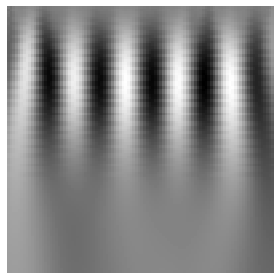

In [6]:
some_cwt = mock_alpha_cwt_dataframe
some_cwt_image = some_cwt.values.reshape(100, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [7]:
mock_alpha_cwt = []
mock_non_alpha_cwt = []

In [8]:
widths = np.linspace(1.0, 15.0, 100);
    
for index, value in enumerate(mock_alpha.iloc):
    npsig = np.fromiter(mock_alpha.iloc[index], float)
    row_cwt = signal.cwt(npsig, signal.ricker, widths)
    row_cwt_flattened = row_cwt.flatten()
    mock_alpha_cwt.append(row_cwt_flattened)
    
for index, value in enumerate(mock_non_alpha.iloc):
    npsig = np.fromiter(mock_non_alpha.iloc[index], float)
    row_cwt = signal.cwt(npsig, signal.ricker, widths)
    row_cwt_flattened = row_cwt.flatten()
    mock_non_alpha_cwt.append(row_cwt_flattened)

In [9]:
mock_alpha_cwt_df = pd.DataFrame(mock_alpha_cwt)
mock_non_alpha_cwt_df = pd.DataFrame(mock_non_alpha_cwt)

In [10]:
mock_alpha_cwt_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.221052,0.378104,0.092782,-0.078473,-0.096136,-0.076215,-0.119727,-0.235073,-0.313962,-0.295959,...,0.401256,0.459946,0.513494,0.561424,0.603242,0.638168,0.665420,0.684572,0.695470,0.697957
1,0.126688,-0.261707,-0.194848,-0.151242,-0.191776,-0.215436,-0.187481,-0.115190,-0.025275,0.043356,...,0.223880,0.234579,0.242869,0.248705,0.251964,0.252716,0.251112,0.247143,0.240636,0.231217
2,-0.003460,0.600776,0.366635,0.167415,0.116853,0.089625,0.044900,-0.018558,-0.100683,-0.182811,...,0.403500,0.437173,0.464258,0.484155,0.497128,0.504035,0.505560,0.501755,0.492119,0.476117
3,0.113978,-0.394377,-0.296907,-0.192668,-0.188346,-0.195239,-0.167759,-0.092938,0.027658,0.156290,...,0.278413,0.261154,0.238694,0.211506,0.180403,0.146462,0.110643,0.073676,0.036167,-0.001430
4,0.054978,-0.545323,-0.386564,-0.225807,-0.153246,-0.089708,-0.027432,0.020843,0.060873,0.123316,...,0.272706,0.273936,0.271859,0.266556,0.258231,0.247022,0.232902,0.215852,0.195851,0.172575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,-0.344357,-1.073105,-0.479108,0.171716,0.582931,0.723943,0.586596,0.234943,-0.197924,-0.522172,...,-0.141583,-0.145276,-0.146541,-0.142325,-0.131652,-0.116028,-0.098211,-0.081215,-0.067411,-0.057407
1420,0.176029,-0.481100,-0.627129,-0.457376,-0.183525,0.058441,0.263444,0.469231,0.584105,0.465229,...,-0.031139,-0.041647,-0.055483,-0.070964,-0.085470,-0.096100,-0.100766,-0.099400,-0.093830,-0.086881
1421,-0.109924,0.471796,0.587823,0.473461,0.194031,-0.207454,-0.560915,-0.689849,-0.539317,-0.184841,...,0.057645,0.103401,0.148956,0.191450,0.228477,0.258764,0.282575,0.300760,0.314369,0.324912
1422,0.497063,0.568335,-0.215046,-0.643621,-0.642464,-0.407343,-0.049492,0.290018,0.530751,0.639134,...,-0.094777,-0.120021,-0.149718,-0.183314,-0.218723,-0.253201,-0.283944,-0.308651,-0.326174,-0.337115


In [11]:
mock_non_alpha_cwt_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-0.515769,-0.567195,0.410663,0.957976,0.620388,-0.202042,-0.811201,-0.793574,-0.219478,0.527202,...,-0.235784,-0.305441,-0.363645,-0.409127,-0.445779,-0.478637,-0.508635,-0.531965,-0.543744,-0.542249
1,0.270630,-0.245903,-0.810154,-0.523075,0.311892,0.918239,0.778088,0.031234,-0.674989,-0.817325,...,-0.261123,-0.242820,-0.225547,-0.210415,-0.194757,-0.174382,-0.146535,-0.112374,-0.076711,-0.045467
2,-0.498733,-0.607840,0.247444,0.874699,0.743417,-0.010132,-0.669796,-0.603528,0.060699,0.656348,...,-0.697609,-0.740596,-0.768777,-0.782357,-0.786344,-0.785500,-0.779796,-0.765702,-0.739807,-0.702148
3,0.010077,0.799055,0.779496,0.078422,-0.653725,-0.889306,-0.509221,0.261076,0.837875,0.651411,...,-0.542816,-0.494819,-0.436159,-0.371549,-0.307310,-0.247808,-0.193383,-0.140709,-0.085614,-0.026693
4,0.556032,0.672001,-0.418657,-0.944275,-0.552760,0.312777,0.893659,0.649981,-0.182110,-0.838253,...,-0.555754,-0.540069,-0.523982,-0.509979,-0.495762,-0.476579,-0.448606,-0.411275,-0.368359,-0.325846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-0.105584,0.060906,0.271509,0.291863,0.012750,-0.427449,-0.557375,0.010424,0.866323,0.917968,...,-0.046409,-0.039399,-0.019351,0.012215,0.046025,0.072681,0.090761,0.107829,0.131542,0.161434
1508,-0.218522,-0.275133,0.062305,0.220427,0.265182,0.319825,0.163154,-0.331899,-0.786698,-0.551410,...,0.113186,0.079271,0.049505,0.022367,-0.010154,-0.053799,-0.105237,-0.154094,-0.192484,-0.221819
1509,0.094818,-0.464211,-0.796026,-0.226703,0.872202,1.352577,0.506645,-0.939072,-1.520896,-0.661565,...,0.152328,0.154062,0.150671,0.151996,0.162683,0.177960,0.189080,0.191471,0.186869,0.180243
1510,-0.183101,-0.567988,-0.163974,0.137398,0.272001,0.367098,0.216073,-0.246728,-0.618371,-0.416933,...,0.051082,0.091543,0.127487,0.153235,0.170204,0.186376,0.208358,0.234340,0.256202,0.267155


Saving figure some_cwt_plot


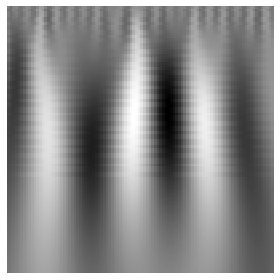

In [12]:
some_non_alpha_cwt = mock_non_alpha_cwt_df.iloc[706]
some_cwt_image = some_non_alpha_cwt.values.reshape(100, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [13]:
mock_alpha_labels = []
mock_non_alpha_labels = []

for cwt_row in mock_alpha_cwt_df.iloc:
    mock_alpha_labels.append(True)
for cwt_row in mock_non_alpha_cwt_df.iloc:
    mock_non_alpha_labels.append(False)
    
mock_alpha_labels_df = pd.DataFrame(mock_alpha_labels)
mock_non_alpha_labels_df = pd.DataFrame(mock_non_alpha_labels)

In [ ]:
mock_data = mock_alpha_cwt_df.append(mock_non_alpha_cwt_df)
mock_data_labels = mock_alpha_labels_df.append(mock_non_alpha_labels_df)

mock_data_labels

,0
0,True
1,True
2,True
3,True
4,True
...,...
1507,False
1508,False
1509,False
1510,False


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mock_data, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(mock_data_labels, test_size=0.2, random_state=42)

train_set_labels_alpha = (train_set_labels.values.ravel() == True)
test_set_labels_alpha = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(train_set, train_set_labels_alpha)

RandomForestClassifier(random_state=42)

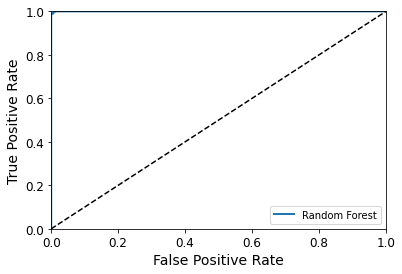

In [20]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_alpha, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_alpha,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Saving figure more_digits_plot


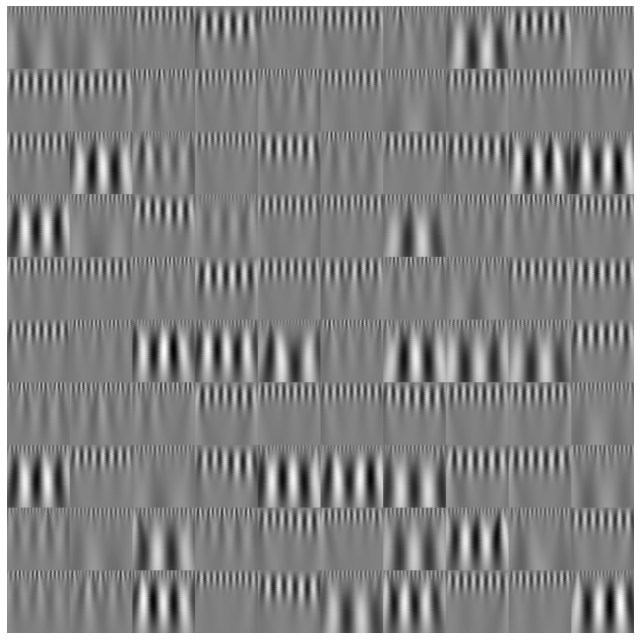

In [21]:
plt.figure(figsize=(9,9))
example_images = np.r_[test_set[:100]]
plot_cwts(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [22]:
forest_clf.predict(example_images)

array([False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False])

In [26]:

np.r_[test_set_labels[:100]]

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [24]:
import joblib

joblib.dump(forest_clf, "forest_clf_all_channels.pkl")

['forest_clf_all_channels.pkl']

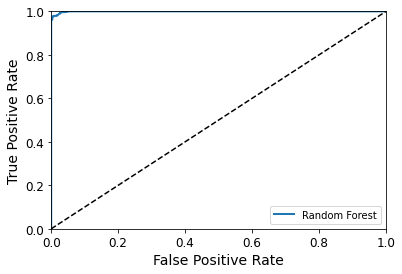

In [27]:
y_probas_forest_test = cross_val_predict(forest_clf, test_set, test_set_labels_alpha, cv=3,
                                    method="predict_proba")

y_scores_forest_test = y_probas_forest_test[:, 1]   # score = proba of positive class
fpr_forest_test, tpr_forest_test, thresholds_forest_test = roc_curve(test_set_labels_alpha,y_scores_forest_test)

plot_roc_curve(fpr_forest_test, tpr_forest_test, "Random Forest")
plt.legend(loc="lower right")
plt.show()